# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here

**Context**
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.
The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

 **Objective**
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business. 

 **Data Description**
The data includes various information related to a food order. A detailed data dictionary is provided below.

**Data Dictionary**

- **`order_id`:** Unique ID of the order.
- **`customer_id`:** ID of the customer who ordered the food
- **`restaurant_name`:** Name of the restaurant
- **`cuisine_type`:** Cuisine ordered by the customer
- **`cost_of_the_order`:** Cost of the order
- **`day_of_the_week`:** Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- **`rating`:** Rating given by the customer out of 5
- **`food_preparation_time`:** Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- **`delivery_time`:** Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### Data Dictionary

Mention the data dictionary here
1. **pandas**.
2. **matplotlib.pyplot**.
3. **seaborn**.
4. **numpy**.

### Let us start by importing the required libraries

In [219]:
# Write your code here to import necessary libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Understanding the structure of the data

In [230]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# made in Jupyter Notebook

In [232]:
# Write your code here to read the data
data=pd.read_csv('foodhub_order.csv')

In [234]:
# secondary data copy
datax=data.copy()

In [236]:
# Write your code here to view the first 5 rows
data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [239]:
# Write your code here
data.shape

(1898, 9)

#### Observations:
There are **1898 rows and 9 columns** in the dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [243]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1) **Types of data**: There are 5 numerical columns and 4 categorical columns in the dataset.
   
2) **Identities**: The order_id and customer_id are not numbers but ids.

3) **`rating`** is read as object because of the "Not rated" element(homogenous data typecast).

4) **`rating`** can be considered as category with numercal values based on the analysis.

5) `day_of_the_week` and `cuisine_type` are categorical coloumns.
6) **No Null Values**: There are no null values considering the object type of `rating` which should be treated at the analysis since it can be a categorical value too.   

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [247]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is **no missing value** according to the result in rating **'Not given'** can also **considered** or **not considered** based on the **analysis**.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [251]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [253]:
data['food_preparation_time'].mean()

27.371970495258168

#### Observations:
1) **minimum** `food_preparation_time` taken is **20 minutes**.
3) **average** `food_preparation_time` taken is **27.371 minutes**.
4) **maximum** `food_preparation_time` taken is **35 minutes**.

### **Question 5:** How many orders are not rated? [1 mark]

In [257]:
# Write the code here
nr=data[data['rating']=='Not given'].shape[0]

print(f'The number of not rated orders are {nr} and that is {(nr/data.shape[0])*100:.2f}.')

The number of not rated orders are 736 and that is 38.78.


#### Observations:
There are total of **736** orders which were not rated which is **Approx 40%** of orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [263]:
# before eda we will set types of variables
data['order_id']=data['order_id'].astype('str')
data['customer_id']=data['customer_id'].astype('str')
data['cuisine_type']=data['cuisine_type'].astype('category')
data['day_of_the_week']=data['day_of_the_week'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   object  
 1   customer_id            1898 non-null   object  
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(2), float64(1), int64(2), object(4)
memory usage: 108.4+ KB


# 1) cost of the order:

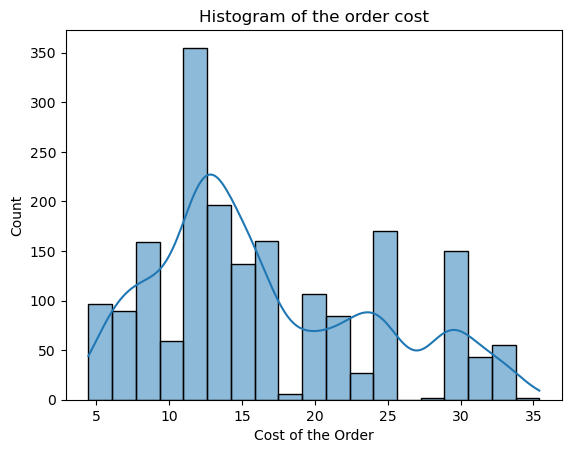

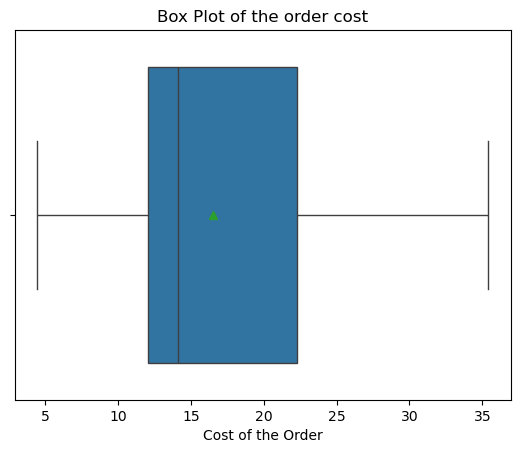

In [266]:
#histogram of cost of order since numeric data 
sns.histplot(data=data,x='cost_of_the_order',kde=True).set(title='Histogram\
 of the order cost',xlabel='Cost of the Order')
plt.show()
#boxplot of cost of order since numeric data
sns.boxplot(data=data,x='cost_of_the_order',showmeans=True).set(title='Box Plot\
 of the order cost' , xlabel='Cost of the Order')
plt.show()

In [268]:
# Description of cost of order
data['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

In [270]:
# Median of cost of the order
data['cost_of_the_order'].median()

14.14

### Analysis of the Distribution of `cost_of_the_order`

1. **Right-Skewed Distribution**:  
   The distribution of `cost_of_the_order` is right-skewed, indicating that most orders have a lower cost, with a few high-cost orders pulling the tail to the right.

2. **Mean vs Median**:  
   Since the distribution is right-skewed, the **mean**(16.4\$) is greater than the **median**(14.14\$).

3. **No Outliers**:  
   There are no significant outliers in the data for `cost_of_the_order`.

4. **Range and Quartiles**:  
   - The order costs range from **\$4.47** to **\$35.4** Dollars and about **75% of orders**
     cost less than **\$23.00**.


### 2) Food preparation time

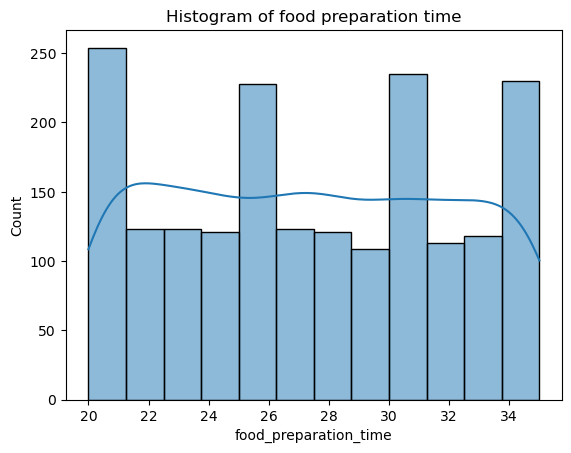

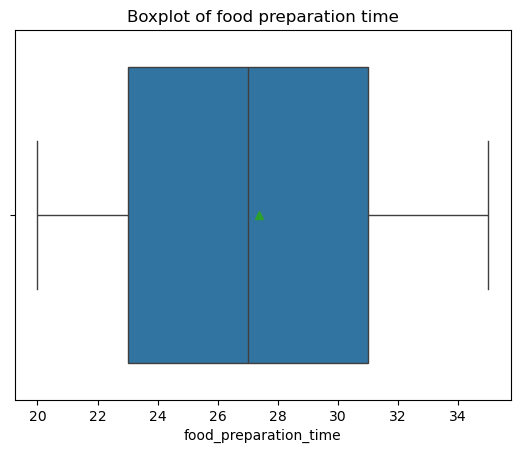

In [275]:
# histogram of Food preparation time since numeric data
sns.histplot(data=data,x='food_preparation_time',kde=True).set(title='Histogram of \
food preparation time', xlabel='food_preparation_time')
plt.show()
#boxplot of Food preparation time since numeric data
sns.boxplot(data=data,x='food_preparation_time',showmeans=True).set(title='Boxplot of \
food preparation time',xlabel='food_preparation_time')
plt.show()

In [277]:
# Description of food preparation time
data['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [279]:
# median of food preparation time
data['food_preparation_time'].median()

27.0

### Analysis of the Distribution of `food_preparation_time`

1. **Distribution Shape**:  
   The variable `food_preparation_time` follows a **normal distribution** with a slight skew towards the right.

2. **Mean vs Median**:  
   The **mean** and **median** are almost the same, with the mean being slightly greater than the median by approximately **0.3 minutes**.

   
4. **No Outliers**:  
   There are no significant outliers in the data for `food_preparation_time`.

   
6. **Range**:  
   - The **maximum food preparation time** is **35 minutes**.  
   - The **minimum food preparation time** is **20 minutes**.


### 3) Delivery time

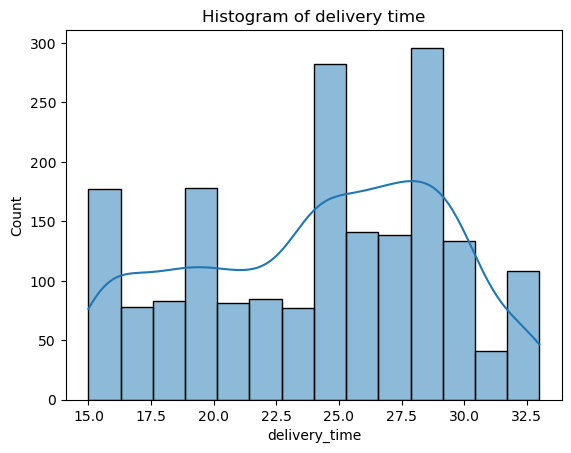

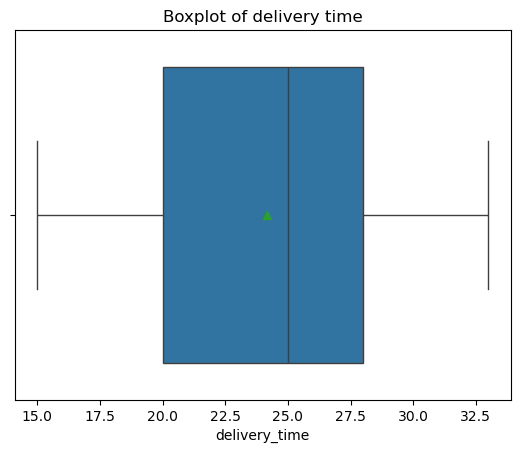

In [283]:
# histogram of Delivery time since numeric data
sns.histplot(data=data,x=data['delivery_time'],kde=True).set(title='Histogram of \
delivery time', xlabel='delivery_time')
plt.show()
# boxplot of delivery time since numeric data
sns.boxplot(data=data,x='delivery_time',showmeans=True).set(title='Boxplot of \
delivery time',xlabel='delivery_time')
plt.show()

In [285]:
# Description of Delivery time
data['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [287]:
#median of Delivery time
data['delivery_time'].median()

25.0

### Analysis of the Distribution of `delivery_time`

1. **Distribution Shape**:  
   The variable `delivery_time` is **left-skewed**, indicating that most delivery times are higher, with a few lower times pulling the tail to the left.

2. **Mean vs Median**:  
   Since it is a left-skewed distribution the **mean** is less than the **median**.

3. **Outliers**:  
   There are **no outliers** in the data for `delivery_time`.

4. **Range**:  
   - The **minimum delivery time** is **15 minutes**.  
   - The **maximum delivery time** is **33 minutes**.
5. **other factors**:
   There are variety of external factors which affect delivery time for example peak traffic hour conditions in cities,weather etc.  

### 4) Rating

[Text(0.5, 1.0, 'Bar Plot of Rating')]

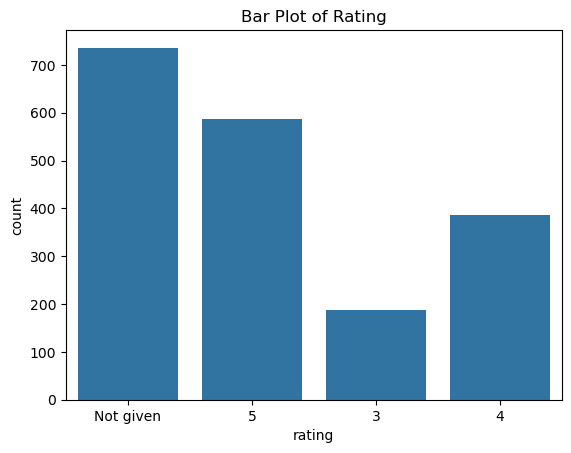

In [291]:
# bar plot of rating before dealing with not rated values.
sns.countplot(data= data,x=data['rating']).set(title='Bar Plot of Rating')

### Analysis of the Distribution of `rating` with null values('Not given')

1. **observations**:
   - most of the orders are not rated and 5 is the next most given rating.
   - There are only **Three** Ratings given (3,4,5).

2. **Treatment of not rated orders**:
   - First we will make the coloumn numeric in order to do mathematical analysis Eg;mean.
   - Then we will treat values by average rating of respective restaurant and cuisine.
   - The reason for this type of treatment is  generally particular restaurant would be good with certain cuisine.
   - The rest of orders with not given rating will given minimum rating   

In [294]:
# Type cahnge into  numeric
data['rating']=pd.to_numeric(data['rating'],errors='coerce')

In [296]:
# filling the NA values with avg Rating of respective restaurant and cuisinne
data['rating']=data['rating'].fillna(value=data.groupby(['restaurant_name','cuisine_type'],\
observed=True)['rating'].transform('mean'))

In [298]:
# The not rated orders after treatment
data['rating'].isnull().sum()

30

In [300]:
# The treatement of remaining values and converted in to integer
data['rating']=data['rating'].fillna(value=data['rating'].min())
data['rating']=data['rating'].astype('int64')

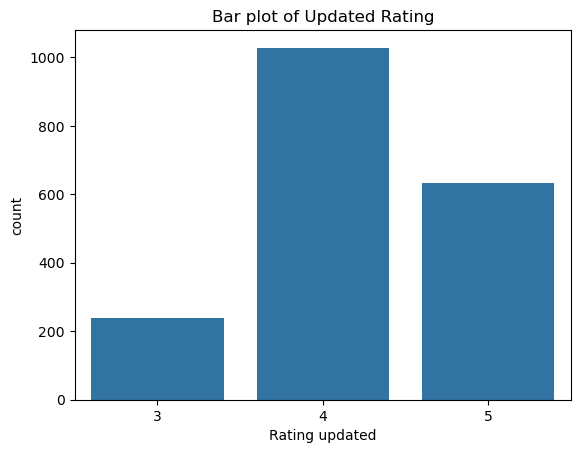

In [302]:
# bar plot of updated rating
sns.countplot(data=data,x='rating').set(title='Bar plot of Updated Rating',xlabel='Rating updated');

In [304]:
# The number of orders in each rating
for i in data['rating'].unique():
    print(f'The number {i} ratings are {data[data['rating']==i].shape[0]}')

The number 3 ratings are 238
The number 4 ratings are 1028
The number 5 ratings are 632


### Analysis of the Distribution of updated `rating`

1. **Most given `rating`**:
   - The most given 'rating' is 4.
2. **Customer satisfaction**:
   - Even though the imputed values are reasonable approximations by common logic, It is difficult to say it completely reflect the satisfaction of customers since ratings are subjective.

### 5) customer id

In [308]:
# since customer id are huge number of identities we check for top 15 customers.
Total_customers=data['customer_id'].nunique()
Total_customers

1200

In [310]:
# top 15 customers
top_15=data['customer_id'].value_counts().head(15)
top_15

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
107909     6
275689     6
60052      6
115213     6
301032     5
Name: count, dtype: int64

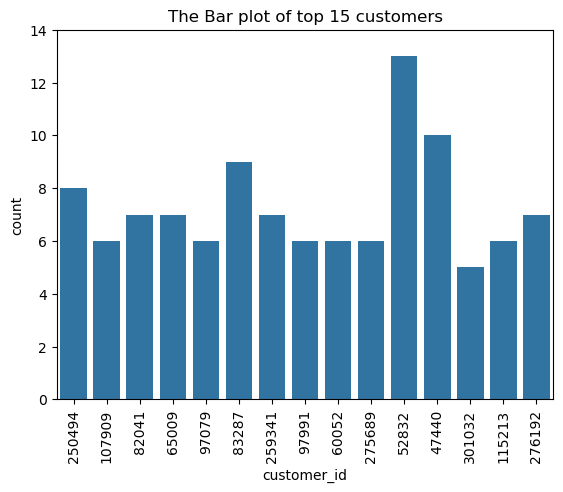

The number of customers are 1200.
There are 784 with 1 order which is 65.33% and constitutes around 41.31% of total orders.
The Top 15 customers have a total of 109 orders which is 5.74 of the total orders


In [312]:
# bar plot of top 15 customers 
sns.countplot(data=data[data['customer_id'].isin(top_15.index)],x='customer_id').set(\
    title='The Bar plot of top 15 customers',xlabel='customer_id',ylim=(0,14))
plt.xticks(rotation=90);
plt.show()
# Getting the number of customers with one order 
count_ord=data['customer_id'].value_counts()
cust_1ord=count_ord[count_ord==1].index
count_1ord=data[data['customer_id'].isin(cust_1ord)].shape[0]
print(f'The number of customers are {Total_customers}.')
print(f'There are {count_1ord} with 1 order which is {(count_1ord/Total_customers)*100:.2f}%\
 and constitutes around {(count_1ord/len(data))*100:.2f}% of total orders.')
print(f'The Top 15 customers have a total of {top_15.sum()} orders \
which is {(top_15.sum()/len(data))*100:.2f} of the total orders')

### Analysis of Customer and Order Data

1. **Total Customers**:  
   There are **1200 customers** in total.

2. **Customer with Maximum Orders**:  
   The customer with the most orders has placed **13 orders**, and their **customer ID** is **52832**.

3. **Single-Order Customers**:  
   There are **784 customers** who have made only **1 order**, which constitutes **65.33%** of the total customer base. These customers account for around **41.31%** of the total orders.

4. **Top 15 Customers**:  
   The **Top 15 customers** account for a total of **109 orders**, which makes up **5.74%** of the total orders.


### 6) Restaurant name:

In [316]:
# Since total number of restaurants is large we will analyze only top 15
total_rest=data['restaurant_name'].nunique()
total_rest

178

In [318]:
# Top 15 restaurants
Top_15_rest=data['restaurant_name'].value_counts().head(15)
Top_15_rest

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Nobu Next Door                    42
Rubirosa                          37
Sushi of Gari 46                  37
Momoya                            30
Five Guys Burgers and Fries       29
Name: count, dtype: int64

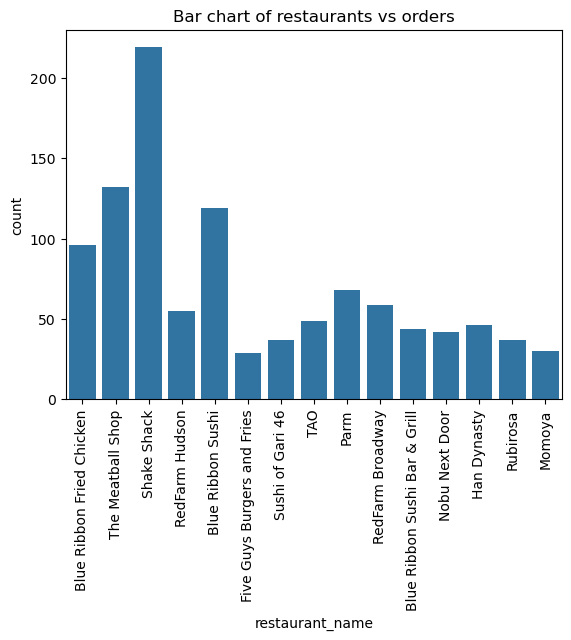

There are total 178 restaurants.
There are 50 restaurants with one order, which is 28.09% of the total restaurants and 2.63% of the total orders.
There are 1062 orders in top 15 restaurants, which is 8.43% of the total restaurants and 55.95% of the total orders.


In [320]:
# The bar chart of number of orders given to Restaurants
sns.countplot(data=data[data['restaurant_name'].isin(Top_15_rest.index)] ,x='restaurant_name').set(title='Bar chart of restaurants vs orders')
plt.xticks(rotation=90)
plt.show()
# restaurants with one order
rest_ord=data['restaurant_name'].value_counts()
rest_1ord=rest_ord[rest_ord==1]
print(f'There are total {total_rest} restaurants.')
print(f"There are {data[data['restaurant_name'].isin(rest_1ord.index)].shape[0]} restaurants with one order, which is "
      f"{(data[data['restaurant_name'].isin(rest_1ord.index)].shape[0] / total_rest) * 100:.2f}% of the total restaurants and "
      f"{(data[data['restaurant_name'].isin(rest_1ord.index)].shape[0] / len(data)) * 100:.2f}% of the total orders.")
print(f"There are {Top_15_rest.sum()} orders in top 15 restaurants, which is "
      f"{(15/ total_rest) * 100:.2f}% of the total restaurants and "
      f"{(Top_15_rest.sum() / len(data)) * 100:.2f}% of the total orders.")


### Analysis of `restaurant_name`:

1. **Total Restaurants**:  
   There are **178 restaurants** in total.

2. **Restaurant with Maximum Orders**:  
   The most orders given to a restaurant is **219 orders**, and their **Restaurant name** is **Shake Shack**.

3. **Single-Order Restaurants**:  
   There are **50 Restaurants** who had only **1 order**, which constitutes **28.09%** of the total number of restaurants. These restaurants account for around **2.63%** of the total orders.

4. **Top 15 Restaurants**:  
   The **Top 15 Restaurants** account for a total of **1062 orders**, which makes up **55.95%** of the total orders.

### 7) day of the week

In [324]:
# days of the week
data['day_of_the_week'].unique()

['Weekend', 'Weekday']
Categories (2, object): ['Weekday', 'Weekend']

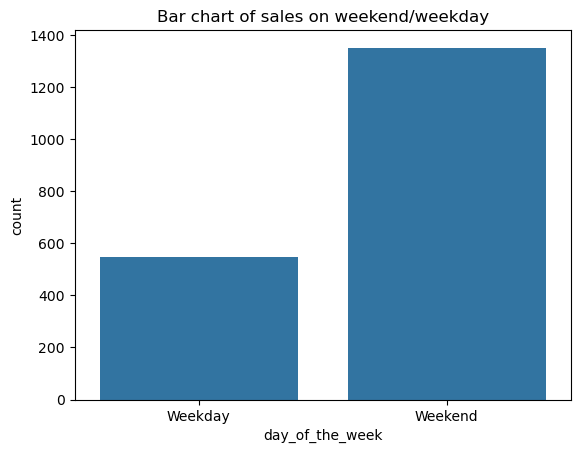

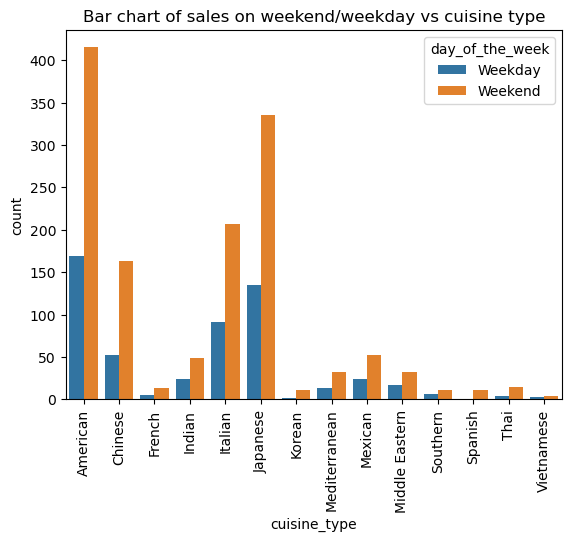

In [326]:
# bar plot of days of the week
sns.countplot(data=data,x='day_of_the_week').set(title='Bar chart of sales on weekend/weekday')
plt.show()
sns.countplot(data=data,x='cuisine_type',hue='day_of_the_week').set(title='Bar chart of sales on weekend/weekday vs cuisine type')
plt.xticks(rotation=90)
plt.show()

### Analysis of number of orders on different days of week
1. **most number of orders**:
   - most number of orders were on weekends.
2. **most number of orders on cuisine type**:
   - most number of orders were american on both weekends and weekdays .

### 8) Cuisine Type

In [330]:
# the number of cuisines
data['cuisine_type'].unique()

['Korean', 'Japanese', 'Mexican', 'American', 'Indian', ..., 'Thai', 'Southern', 'French', 'Spanish', 'Vietnamese']
Length: 14
Categories (14, object): ['American', 'Chinese', 'French', 'Indian', ..., 'Southern', 'Spanish', 'Thai', 'Vietnamese']

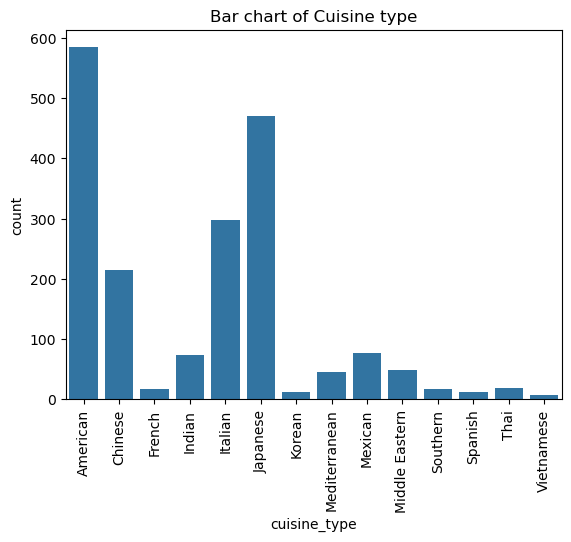

In [332]:
# bar chart of cuisine type 
sns.countplot(data=data, x= 'cuisine_type').set(title='Bar chart of Cuisine type')
plt.xticks(rotation =90)
plt.show()

In [334]:
data['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

### Analysis on number of orders on `Cuisine_type`

**Most ordered `cuisine_type`**:
-The american cuisine is the most ordered `cuisine_type`.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [338]:
# Write the code here
top5_rest=data['restaurant_name'].value_counts().head(5)
print(top5_rest)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
## Top 5 Restaurants and Their Sales

1. **Shake Shack**:  
   - Total Orders: **219**  
   - Shake Shack leads the chart with the highest number of orders among all restaurants.  

2. **The Meatball Shop**:  
   - Total Orders: **132**  
   - The Meatball Shop ranks second, with approximately **60.27%** of Shake Shack's total orders.

3. **Blue Ribbon Sushi**:  
   - Total Orders: **119**  
   - Known for its sushi, this restaurant takes the third spot in terms of sales.  

4. **Blue Ribbon Fried Chicken**:  
   - Total Orders: **96**  
   - This restaurant highlights customer preference for fried chicken, coming in fourth place.

5. **Parm**:  
   - Total Orders: **68**  
   - Parm completes the top 5 list, contributing **31.05%** of Shake Shack's total orders.  

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

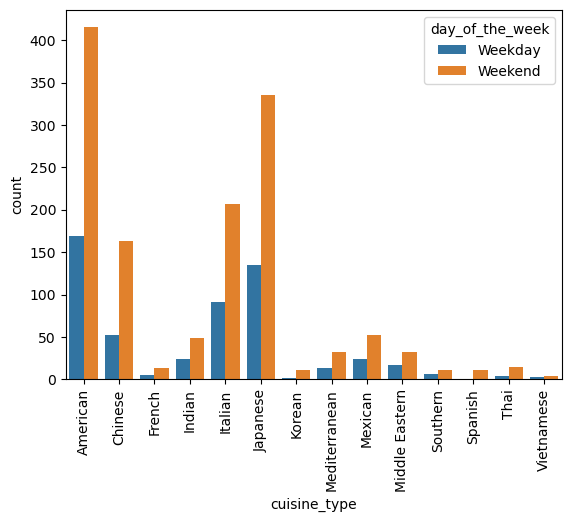

In [342]:
# Write the code here
sns.countplot(data=data,x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show();

In [344]:
data[data['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
The most popular `cuisine_type` on weekends is **American** cuisine with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [348]:
# Write the code here
per_cost_more_20=data[data['cost_of_the_order']>20].shape[0]
print(f'The percentage of orders cost more than 20 $ is {(per_cost_more_20/len(data)*100):.2f}% ')

The percentage of orders cost more than 20 $ is 29.24% 


#### Observations:
The percentage of orders cost more than 20 $ is **29.24%** 

### **Question 10**: What is the mean order delivery time? [1 mark]

In [352]:
# Write the code here
print(f'The mean delivery time is: {data['delivery_time'].mean():.2f} minutes')

The mean delivery time is: 24.16 minutes


#### Observations:
The mean `delivery_time` is: **24.16 minutes**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [356]:
# Write the code here
data['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
## Top 3 Customers and Their Number of Orders

1. **Customer ID: 52832**  
   - Total Orders: **13**  
   - This customer has placed the highest number of orders, making them the most frequent customer.

2. **Customer ID: 47440**  
   - Total Orders: **10**  
   - Ranked second, this customer has consistently ordered, contributing significantly to the total orders.

3. **Customer ID: 83287**  
   - Total Orders: **9**  
   - This customer completes the top 3 list with 9 orders, showcasing their loyalty.

- The top 3 customers collectively account for **32 orders**, highlighting their significant contribution to overall sales.  



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [361]:
data.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

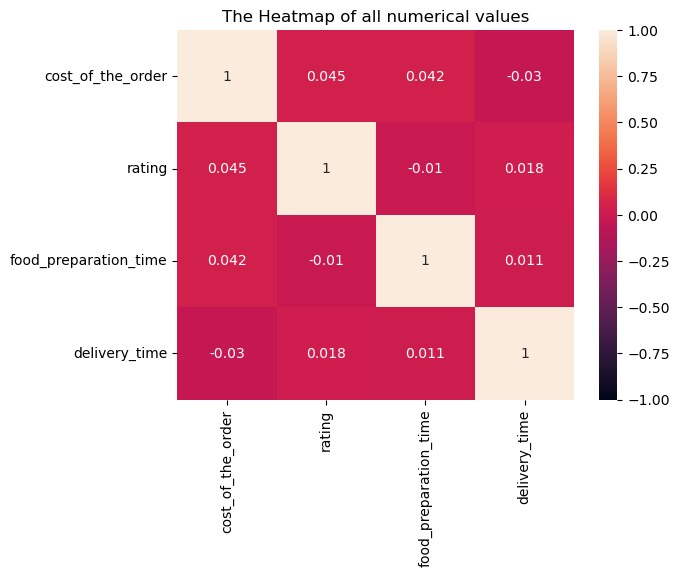

In [363]:
# Write the code here
# as first step we will see correlation between numerical values
sns.heatmap(data=data[['cost_of_the_order', 'rating','food_preparation_time', 'delivery_time']].corr(),\
annot=True,vmax=1,vmin=-1,cbar=True).set(title='The Heatmap of all numerical values')
plt.show();

<Figure size 1000x1000 with 0 Axes>

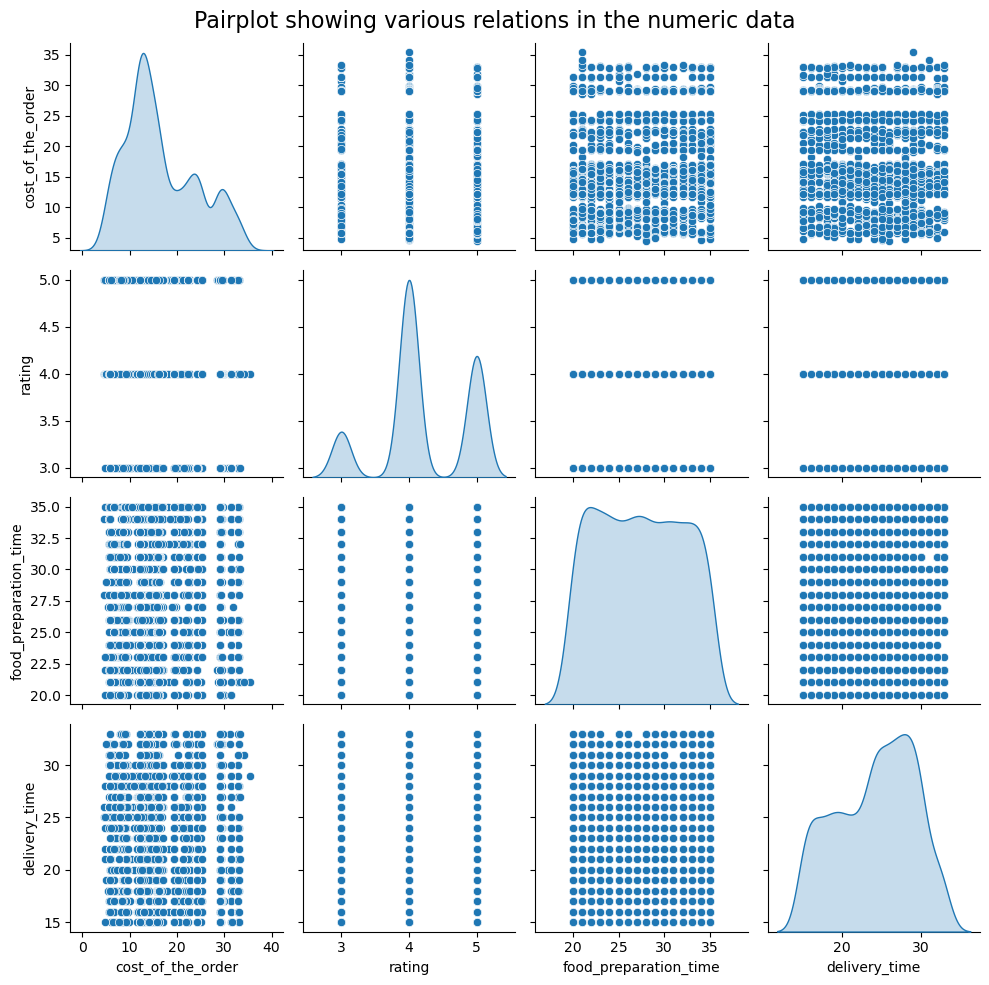

In [365]:
# now we will check every realation with pairplot
fig=plt.figure(figsize=(10,10))
sns.pairplot(data=data,diag_kind='kde').fig.suptitle('Pairplot showing various relations in the numeric data',fontsize=16)
plt.tight_layout()
plt.show()


### Analysis on the different numerical values:
1. **Correlation status**: There is very **weak correlation** between numerical values.
 
2. **correlation btw categories and numerical**: So, we will goup data by restaurant name and take aggregates for categories such as counts and number of unique elements according to categories and for numeric data we take mean.
 
3. **Two Types Rating Data**: For this we will analyse in two types with original `rating` which has **not given** and another column added to called `rating_num` which contains float numeric.(**not given** as NaN) And another type would have treated rating. 

### 1) Analysis based on `restaurant_name`

## i) analysis with original data using copy

In [370]:
# we make a copy of original copy
dx=datax.copy()
# we make column of numeric data for rating in the copy
dx['rating_num']=pd.to_numeric(datax['rating'],errors='coerce')


In [372]:
# before we group the by restaurants,
# We will check how many restaurants have orders in more than one cuisine.
# so that we can decide how to aggregate cuisine type
rest_mc=dx.groupby(['restaurant_name'])['cuisine_type'].nunique()
rest_cui=dx.groupby(['restaurant_name'])['cuisine_type'].value_counts()
print('The restaurants which have orders with more than one cuisine are:')
print(rest_mc[rest_mc>1])
print('-'*50)
print('And the cuisines are :')
print(rest_cui.loc['The Meatball Shop'])

The restaurants which have orders with more than one cuisine are:
restaurant_name
The Meatball Shop    2
Name: cuisine_type, dtype: int64
--------------------------------------------------
And the cuisines are :
cuisine_type
Italian     112
American     20
Name: count, dtype: int64


In [374]:
# since one element of cuisine_type has more than one type of element.
# we will drop cuisine type since it is correlation btw order count and other attributtes
# with respect to restaurants.
data_restaurant=dx.groupby('restaurant_name').agg({'order_id':'count','customer_id':'nunique',
                                                 'rating_num':'mean',
                                                 'food_preparation_time':'mean',
                                                 'delivery_time':'mean','cuisine_type':'first','cost_of_the_order':'mean',
                                                 'rating': lambda x: x[x!='Not given'].count() })
 
                                                 
data_restaurant = data_restaurant.rename(columns={'order_id': 'No_of_orders','customer_id':'No_of_customers','rating':'No_of_ratings',
                                                  'delivery_time':'mean delivery_time','food_preparation_time':'mean food_preparation_time'})


In [376]:
data_restaurant.columns

Index(['No_of_orders', 'No_of_customers', 'rating_num',
       'mean food_preparation_time', 'mean delivery_time', 'cuisine_type',
       'cost_of_the_order', 'No_of_ratings'],
      dtype='object')

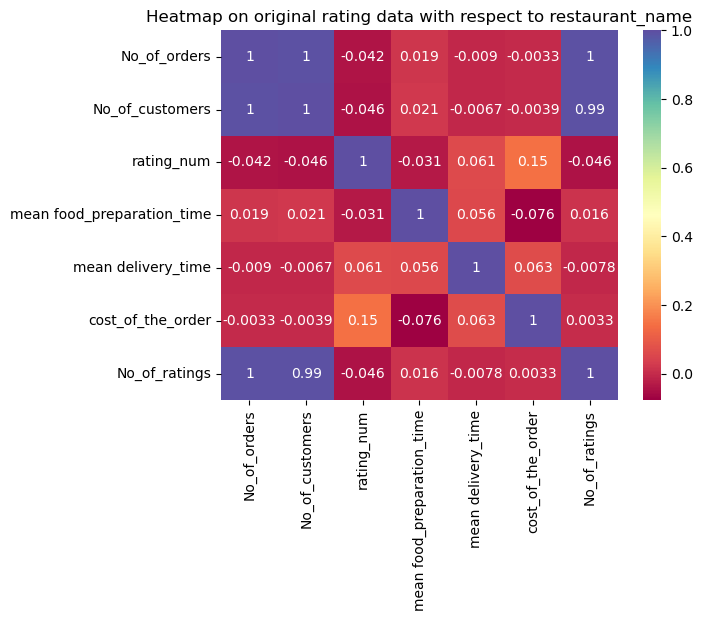

In [378]:
sns.heatmap(data=data_restaurant[['No_of_orders', 'No_of_customers', 'rating_num',
       'mean food_preparation_time', 'mean delivery_time',
       'cost_of_the_order', 'No_of_ratings']].corr(),annot=True,cbar=True,cmap='Spectral').set(title='Heatmap on original rating data with respect to restaurant_name')
plt.show()

## ii) analysis with corrected rating data.

In [381]:
data.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [383]:
da_restaurant=data.groupby(['restaurant_name']).aggregate({'order_id':'count', 'customer_id':'nunique', 'cuisine_type':'first',
       'cost_of_the_order':'mean','rating':'count','food_preparation_time':'mean','delivery_time':'mean'})


In [385]:
da_restaurant=da_restaurant.rename(columns={'order_id': 'No_of_orders','customer_id':'No_of_customers','rating':'No_of_ratings'
                                            ,'delivery_time':'mean delivery_time','food_preparation_time':'mean food_preparation_time'})

In [387]:
da_restaurant.columns

Index(['No_of_orders', 'No_of_customers', 'cuisine_type', 'cost_of_the_order',
       'No_of_ratings', 'mean food_preparation_time', 'mean delivery_time'],
      dtype='object')

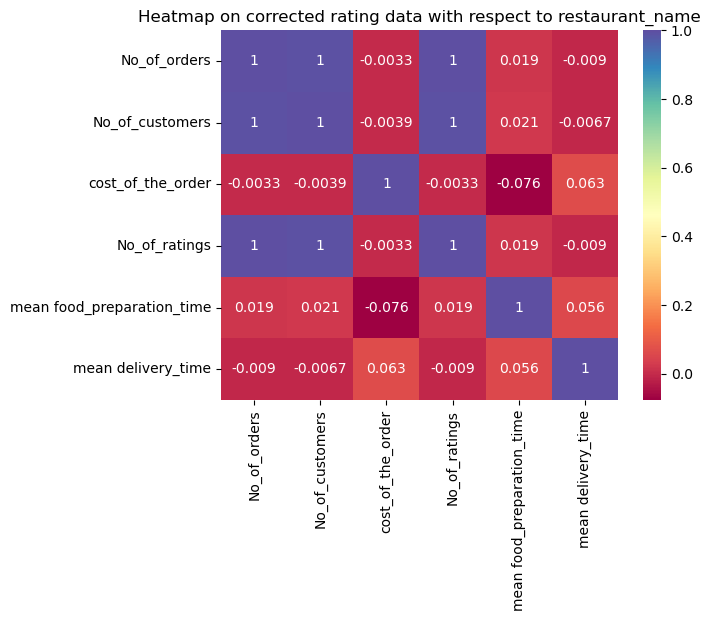

In [389]:
sns.heatmap(data=da_restaurant[['No_of_orders', 'No_of_customers', 'cost_of_the_order',
       'No_of_ratings', 'mean food_preparation_time', 'mean delivery_time']].corr(),annot=True,cbar=True,cmap='Spectral').set(title='Heatmap on corrected rating data with respect to restaurant_name')
plt.show()

### Analysis on numeric data with respect to `restaurant_name`
1. **Restaurant with more than one cuisine**:Restaurant with more than one cuisine is **The Meatball Shop** around **112 orders
   in Italian** and **20 orders in American**.

2. **No Difference**:There is no difference between two types of correlations on basis of rating meaning the treatement of ratings with mean is reasonable.

3. **Correlation status**: There is **strong correlation** between `No_of_orders` and `No_of_ratings` showing that with **more number of orders** have more number of rated order that is **more response from customers**.

### 2) Analysis based on `rating`

## `rating` **vs** `cost_of_the_order`

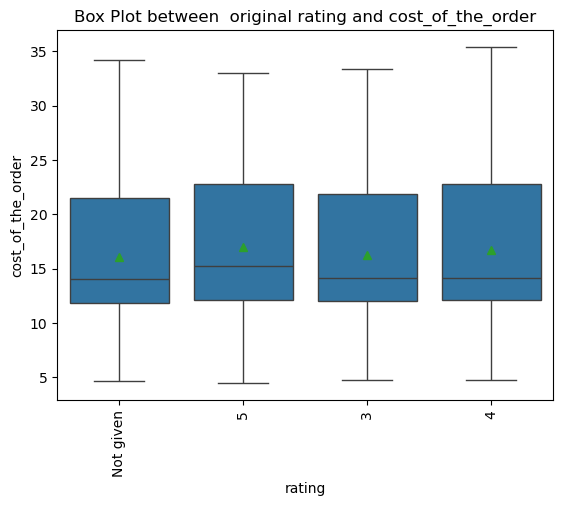

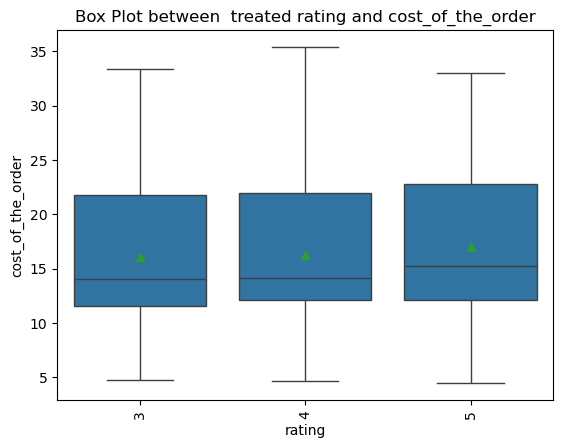

In [394]:
# using original rating using copy
sns.boxplot(data=datax,x='rating',y='cost_of_the_order',showmeans=True)\
.set(title='Box Plot between  original rating and cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

# using treated rating 
sns.boxplot(data=data,x='rating',y='cost_of_the_order',showmeans=True)\
.set(title='Box Plot between  treated rating and cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

## `rating` **vs** `delivery_time`

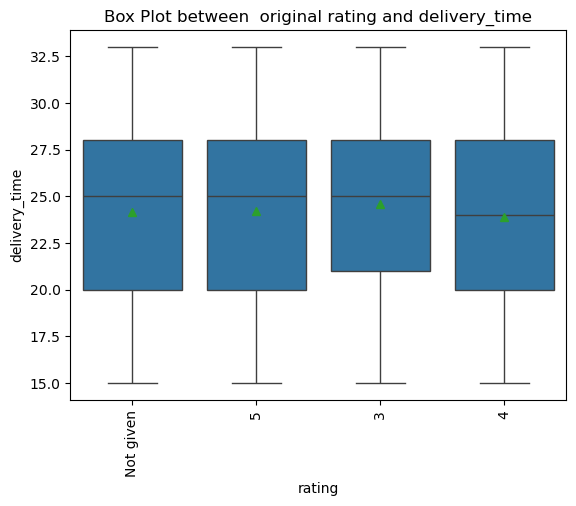

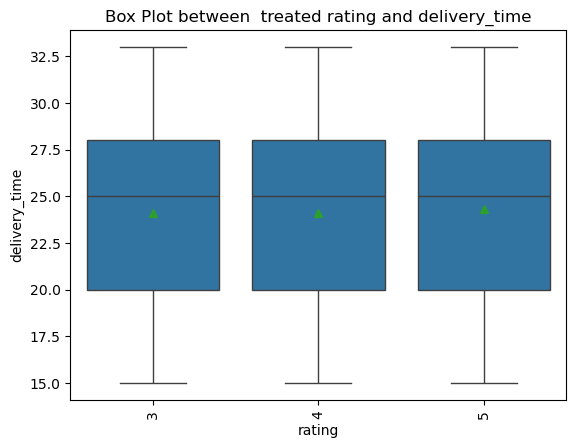

In [397]:
# using original rating using copy
sns.boxplot(data=datax,x='rating',y='delivery_time',showmeans=True)\
.set(title='Box Plot between  original rating and delivery_time')
plt.xticks(rotation=90)
plt.show()

# using treated rating 
sns.boxplot(data=data,x='rating',y='delivery_time',showmeans=True)\
.set(title='Box Plot between  treated rating and delivery_time')
plt.xticks(rotation=90)
plt.show()

## `rating` **vs** `food_preparation_time`

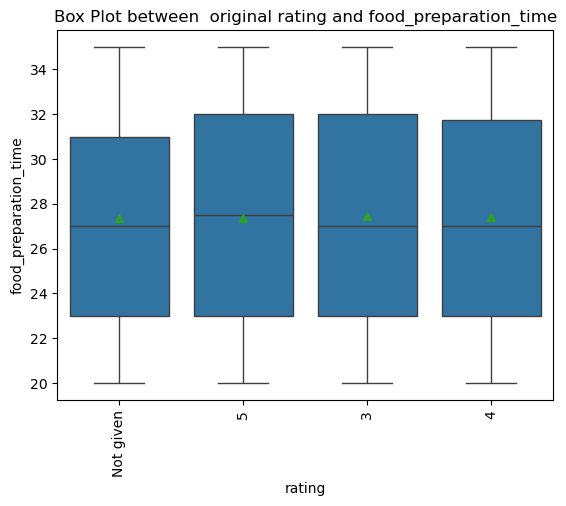

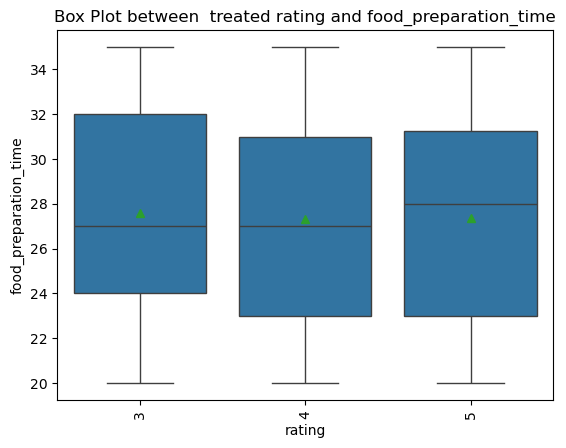

In [400]:
# using original rating using copy
sns.boxplot(data=datax,x='rating',y='food_preparation_time',showmeans=True)\
.set(title='Box Plot between  original rating and food_preparation_time')
plt.xticks(rotation=90)
plt.show()

# using treated rating 
sns.boxplot(data=data,x='rating',y='food_preparation_time',showmeans=True)\
.set(title='Box Plot between  treated rating and food_preparation_time')
plt.xticks(rotation=90)
plt.show()

### Analysis on `food_preparation_time`,`delivery_time`,`cost_of_the_order` by `rating`:
1. **Little to no difference**: Based on the on observation there is only **slight differences**(`delivery_time` on rating 4) in the analysis when compared with **two types of ratings**.

2. **Effect of `rating`**: The Three sets of graphs show there is **little to no effect** of `food_preparation_time` ,`delivery_time`,`cost_of_the_order` over `rating`.

3. **Under customer Expectation**: This means the **Timings and cost** are considered to normal or **consistent with respect to area** and **under customer expectation**. 

### 3) Analysis based on `day_of_the_week`:

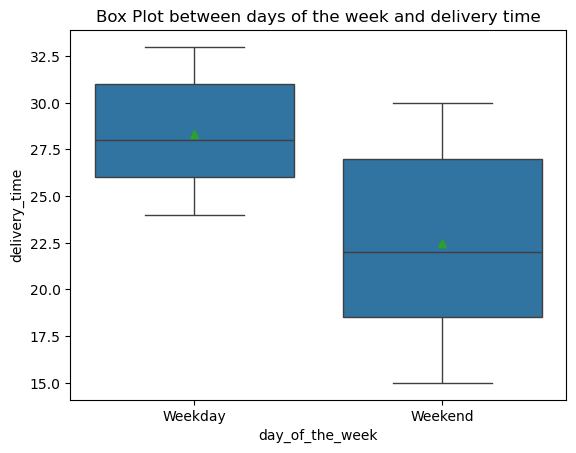

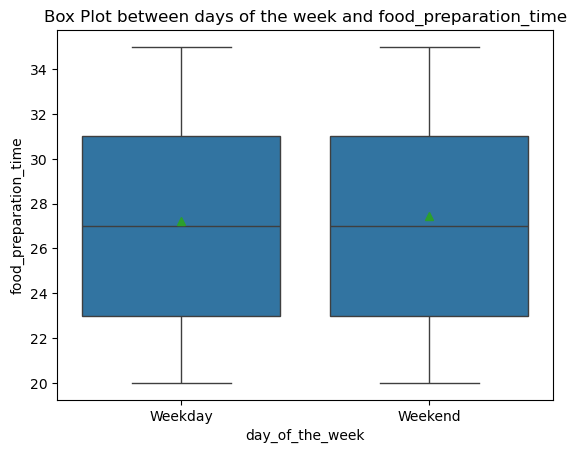

In [404]:
# analysis of delivery time by day of the week
sns.boxplot(data=data,x='day_of_the_week',y='delivery_time',showmeans=True)\
.set(title='Box Plot between days of the week and delivery time')
plt.show()

# analysis of food preparation time by day of the week
sns.boxplot(data=data,x='day_of_the_week',y='food_preparation_time',showmeans=True)\
.set(title='Box Plot between days of the week and food_preparation_time')
plt.show()

### Analysis on `food_preparation_time`,`delivery_time` by `day_of_the_week`:
1) **`delivery_time`**: The minimum `delivery_time` on weekdays is more than the average `delivery_time`on weekends which can be attributed to the traffic on weekdays And range of `delivery_time`on weekday is less than weekend.
2) **`food_preparation_time`**: There is insignificant difference in `food_preparation_time` on weekends and weekdays.

### 4) Analysis based on `Cuisine_type`

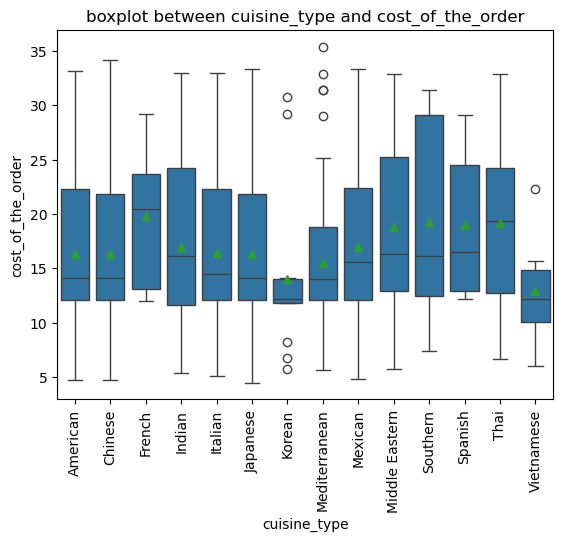

In [408]:
# boxplot of Cost_of_the_order by cuisine_type
sns.boxplot(data=data,x='cuisine_type',y='cost_of_the_order',showmeans=True).\
set(title='boxplot between cuisine_type and cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

### Analysis on `Cost_of_the_order` by `cuisine_type`:
1. **Cheap Foods**: The cheapest `cuisine_type` are **Korean** and **vietnamese**.
2. **Exteremeties**: The cheapest order is from **Japanese** cuisine(4.47) and most expensive order is from **Mediterranean** cuisine(35.41).
3. **Outliers**: The korean,vietnamese and Mediterranean cuisines have outlier.
4. **Average cost**: on an average all the cuisines have an average cost **less than appox 22$** And **75% orders cost less than 30 Dollars**.

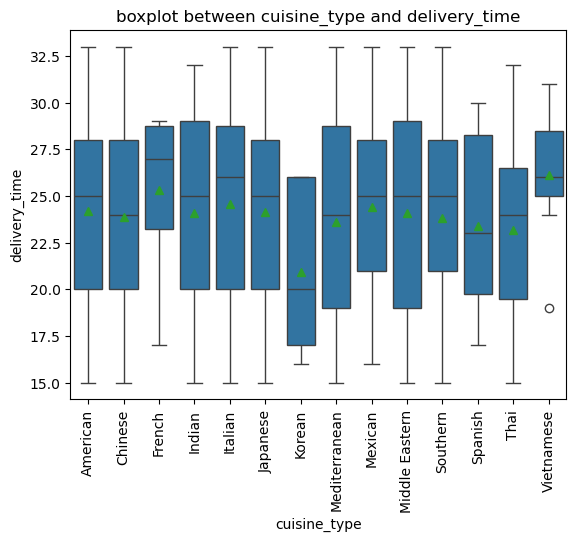

In [411]:
# boxplot of delivery_time by cuisine_type
sns.boxplot(data=data,x='cuisine_type',y='delivery_time',showmeans=True).\
set(title='boxplot between cuisine_type and delivery_time')
plt.xticks(rotation=90)
plt.show()

### Analysis of `delivery_time` by `cuisine_type`:
1. **fast deliveries**: The **Korean** foods are delivered much faster.
2. **Outliers**: The vietnamese cuisine has outlier.
3. **Average Time**: On an average most of cuisine are delivered in range of 23 to 26 minutes and 75% of orders are delivered in less than 29 minutes.

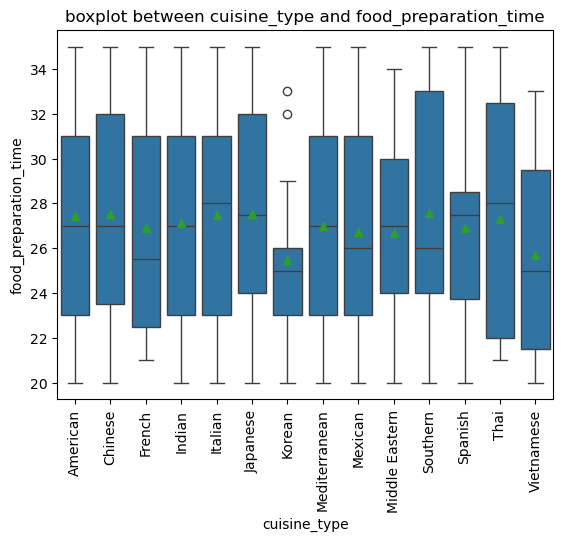

In [414]:
# boxplot of food_preparation_time by cuisine_type
sns.boxplot(data=data,x='cuisine_type',y='food_preparation_time',showmeans=True).\
set(title='boxplot between cuisine_type and food_preparation_time')
plt.xticks(rotation=90)
plt.show()

### Analysis of `food_preparation_time` by `cuisine_type`:
1. **faster preparations**: The **Korean** foods are prepared much faster.
2. **Outliers**: The **korean** cuisine has outlier.
3. **Average Time**: On an average most of cuisine are prepared in less than 29 minutes.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [418]:
# Write the code here
# we group the enire data by restaurant name and rating by mean and count
df=data.groupby('restaurant_name')['rating'].aggregate(('mean','count'))
# we set the mean to greater that 4 and count more than 50
df[(df['count']>50) & (df['mean']>4)]

,mean,count
restaurant_name,,
Blue Ribbon Fried Chicken,4.218750,96
Blue Ribbon Sushi,4.134454,119
Parm,4.073529,68
RedFarm Broadway,4.169492,59
RedFarm Hudson,4.109091,55
Shake Shack,4.168950,219
The Meatball Shop,4.325758,132


In [420]:
# Write the code here
# we group the enire Original data copy (with 'Not given') by restaurant name and rating by mean and count
datax['rating']=pd.to_numeric(datax['rating'],errors='coerce')
dif=datax.groupby('restaurant_name')['rating'].aggregate(('mean','count'))
# we set the mean to greater that 4 and count more than 50
dif[(dif['count']>50) & (dif['mean']>4)]

,mean,count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


#### Observations:
## Restaurants with High Ratings

### Original Ratings:
The following restaurants have a rating count of more than 50 and an average rating greater than 4:
1. **Blue Ribbon Fried Chicken**
2. **Blue Ribbon Sushi**
3. **Shake Shack**
4. **The Meatball Shop**

### Updated Ratings:
After updating the ratings, the following restaurants meet the criteria of a rating count greater than 50 and an average rating greater than 4:
1. **Blue Ribbon Fried Chicken**  
2. **Blue Ribbon Sushi**  
3. **Parm**  
4. **RedFarm Broadway**  
5. **RedFarm Hudson**  
6. **Shake Shack**  
7. **The Meatball Shop**


- **New Additions:**  
  - The updated ratings introduced **Parm**, **RedFarm Broadway**, and **RedFarm Hudson** into the list of high-rated restaurants.
  
- **Consistent Performers:**  
  - **Blue Ribbon Fried Chicken**, **Blue Ribbon Sushi**, **Shake Shack**, and **The Meatball Shop** remain high-performing restaurants even after the ratings update.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [424]:
# Write the code here
def price(a):
    if (a['cost_of_the_order']>20):
        return a['cost_of_the_order']*.25
    elif(a['cost_of_the_order']>5):
        return a['cost_of_the_order']*.15
    else:
        return 0
        
# creating a coloumn called revenue
data['Revenue']=data.apply(price,axis=1)
Net_revenue=data['Revenue'].sum()
print(f'The Net revenue generated is {Net_revenue:.2f}$')

The Net revenue generated is 6166.30$


#### Observations:
The Net revenue for the company is **6166.30$**.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [428]:
# Write the code here
#creating column called total time 
data['Total Time']=data['delivery_time']+data['food_preparation_time']
count_ord_m60=data[data['Total Time']>60].shape[0]
print(f'The percentage of orders that take more than 60 min is {(count_ord_m60/len(data))*100:.2f}%.')

The percentage of orders that take more than 60 min is 10.54%.


#### Observations:
The percentage of orders that take more than 60 min is **10.54%**.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [432]:
# Write the code here
# we will group the entire data by day of the week and delivery time
data.groupby('day_of_the_week',observed=True)['delivery_time'].mean()


day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

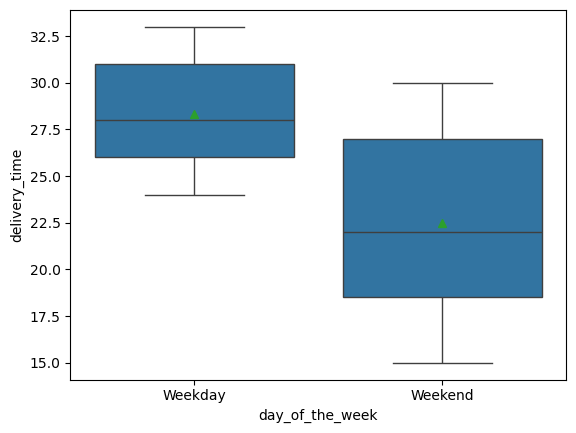

In [434]:
sns.boxplot(data=data,x='day_of_the_week',y='delivery_time',showmeans=True)

#### Observations:
The Average `delivery_time` on weekdays are found to be **Higher**.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* About **40%** of orders were **not rated** even though there is only **slight difference** in analysis of both **approximate imputed rating data** and **not rated data** the challenges that persist are:
  - Still it is **difficult** to understand **customer satisfaction** since ratings are  **subjective to person to person**.
  - since it is **40%** which implies customers are **less intrested in rating service**.
*  The **Top 15 restaurants** alone have received around **55~56%** of the total orders.
*  The **Top 3 cuisines** were:
   1. **American**.
   2. **Japanese**.
   3. **Italian**.
* There is no change in customer preferences(**cuisine**) on weekends and weekdays.
* The number of orders on **weekends** are higher than **weekdays**.
* The **Meatball Shop** is the only restaurant with **multiple cuisines(2)** around 112 orders in **Italian** and 20 orders in **American**.
* About the Single orders **65% of customers** made single order and **28% of restaurants** received single orders.
* **weekend Deliveries** are significantly **faster** than **deliveries on weekdays** which can be attributed to **traffic present on weekdays**.
* About **10~11%** orders take **more than a hour** to be prepared and delivered.
* Around **6166.30$** is generated as net revenue according to the charges made by company.
* The most **frequent customer: 52832** has made **13 orders** through the app.
* Around **29~30%** orders cost **more than 20 Dollars**.
* **Korean cuisines** were **made and delivered significantly faster**.

### Recommendations:

1. **Popular Methodlogies**: Introduce bestseller Or top n restaurants or similar methodologies to **make the restaurant** emphasis on **impoving** their **ratings** and thereby **encouraging** the **customers** to **rate** their **orders**.
  
2. **offers& coupons**: Encourage customers to make more order by **offering coupons,discount** etc.

  
3. **bottleneck of Delivery_time**: Since **Delivery time(traffic)** can be controlled to only some extent **preparation time** can be **shortened** by:
   - putting **more emphasis** on **most moving cuisines** such as **american,japanese and italian**.
   - Even in theses cuisines more empasis can be given to foods **cost less than 20 dollars**.
     
4. **More choices**: The **choices** in **most moving cuisines** can be **increased**.
  
5. **App suggestor**: Suggestion of **nearby restaurants** according to customer preferences for **faster deliveries** through **app** can be **made**.
  
6. **Price range**: More choices under 20 dollars can be made with restaurant.

7. **More analysis**: Apart from the attibutes in the data there are myriad of elements that affects the Rating and satisfaction which are to be found out.    